<a href="https://colab.research.google.com/github/Vergaraagustin/DataScience/blob/main/Data_StoryTelling_Vergara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Mejorando la gestión de riesgos y la experiencia del cliente con predicción de tarjetas de crédito

**Introduccion:**
Se utilizar técnicas de predicción de tarjetas de crédito basadas en un análisis de datos para tomar decisiones más precisas y mejorar la calidad de los servicios ofrecidos. Para ello, se ha explorado una valiosa base de datos existente, que servirá como fuente de información para futuros proyectos.
La base de datos en cuestión contiene una amplia variedad de variables relacionadas con los clientes del banco, contiene información valiosa que puede ser utilizada para desarrollar modelos predictivos, identificar patrones y tendencias, y generar ideas para mejorar la toma de decisiones en el banco.

**Objetivo:** El objetivo principal de este proyecto es utilizar la base de datos existentes para complementar la otra base de datos, que ayuden al banco a predecir y predecir el riesgo crediticio de sus clientes.


##Carga de API de Kaggle.
  Se realiza carga de base y se tranforma en un dataframe

In [ ]:
!rm -rf /root/.kaggle.

In [ ]:
api_token = {"username":"agustinvergara",
             "key":"72856697dc569bf41ba007e185fe3cc2"}

In [ ]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token,file)

In [ ]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

credit-card-approval-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

archivo_zip = '/content/credit-card-approval-prediction.zip'


with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)


application_record.csv
credit_record.csv


In [ ]:
import pandas as pd

nombre_archivo_csv = 'application_record.csv'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  with zip_file.open(nombre_archivo_csv) as archivo_csv:
    df_app = pd.read_csv(archivo_csv)

In [ ]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


##Limpieza 
  Se realiza una limpieza de los datos, la eliminación de 3 columnas que no son importantes para el proyecto, se remplaza datos de la columna de ocupación no se eliminan por que representan en 30% de los datos de dicha columna.

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_app = df_app.drop(['DAYS_BIRTH', 'FLAG_PHONE', 'FLAG_WORK_PHONE'], axis=1)

In [ ]:
df_app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
df_app["OCCUPATION_TYPE"].isna().sum()/df_app.shape[0]

0.30601039317580153

In [ ]:
df_app["OCCUPATION_TYPE"].fillna("unknown", inplace=True)

##Reportes: 
 Los datos revelan lo siguiente 
Los trabajadores y asociados comerciales son los que mayores ingresos tienen.
Podemos diferenciar los datos por el estado civil de los clientes, en el cual un gran porcentaje esta casado, viviendo en casas o apartamentos, podemos decir también que el 30% de los clientes no notifico su ocupación actual. Mas del 45% concluyeron el secundario o está en curso, el siguiente son los clientes con nivel de educación más alta.



In [ ]:
# Maximo ingreso de cada tipo de trabajo.
agrupado = df_app.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].max().sort_values( ascending=False)
print(agrupado)

NAME_INCOME_TYPE
Working                 6750000.0
Commercial associate    3950059.5
State servant           3150000.0
Pensioner               1260000.0
Student                  225000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
#Cantidad de dias sin trabajar de cada tipo de trabajo.
df_app.groupby('NAME_INCOME_TYPE')['DAYS_EMPLOYED'].max().sort_values( ascending=False)

NAME_INCOME_TYPE
Pensioner               365243
Commercial associate       -12
Working                    -12
State servant              -16
Student                   -382
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
df_app.NAME_FAMILY_STATUS.value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
df_app.NAME_HOUSING_TYPE.value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

Contamos con un gran porcentaje de datos de usuarios en donde viven es Casa/Apartamento.

In [ ]:
df_app.OCCUPATION_TYPE.value_counts()

unknown                  134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df_app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

##Visualizacion de datos.
  Se realizan visualizaciones para una mayor comprensión de los datos.

In [ ]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

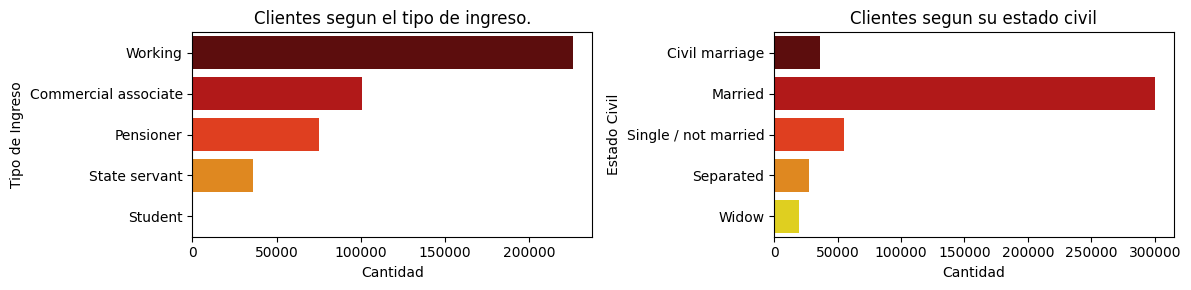

In [ ]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=df_app.NAME_INCOME_TYPE, linewidth=1.2, ax=axes[0])
g1.set_title("Clientes segun el tipo de ingreso.")
g1.set_xlabel("Cantidad")
g1.set_ylabel("Tipo de Ingreso")

g2=sns.countplot(y=df_app.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Clientes segun su estado civil")
g2.set_xlabel("Cantidad")
g2.set_ylabel("Estado Civil")

fig.set_size_inches(12,3)
plt.tight_layout()
plt.show()

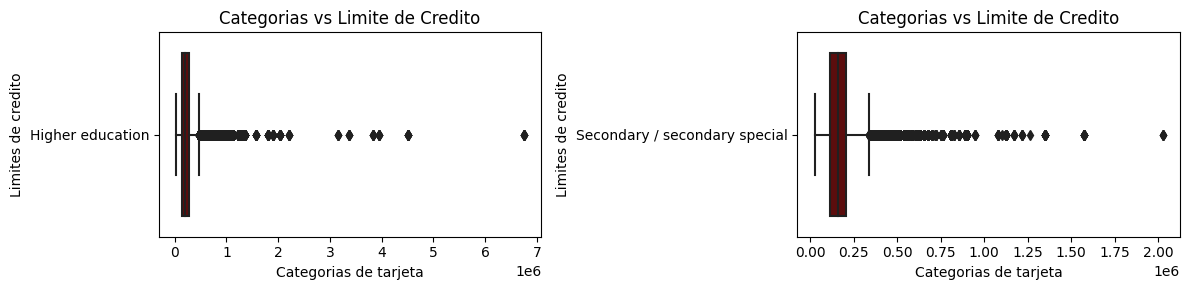

In [ ]:
fig, axes = plt.subplots(1,2)
data = df_app[["CODE_GENDER","NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL"]]
filtro1= data[data['NAME_EDUCATION_TYPE'] == "Higher education"]
filtro2 = data[data['NAME_EDUCATION_TYPE'] == "Secondary / secondary special"]

g3 = sns.boxplot(data=filtro1 , x = 'AMT_INCOME_TOTAL' , y = 'NAME_EDUCATION_TYPE', ax=axes[0])
g3.set_title('Categorias vs Limite de Credito')
g3.set_xlabel('Categorias de tarjeta')
g3.set_ylabel('Limites de credito')

g4 = sns.boxplot(data=filtro2 , x = 'AMT_INCOME_TOTAL' , y = 'NAME_EDUCATION_TYPE', ax=axes[1])
g4.set_title('Categorias vs Limite de Credito')
g4.set_xlabel('Categorias de tarjeta')
g4.set_ylabel('Limites de credito')


fig.set_size_inches(12,3)
plt.tight_layout()
plt.show()

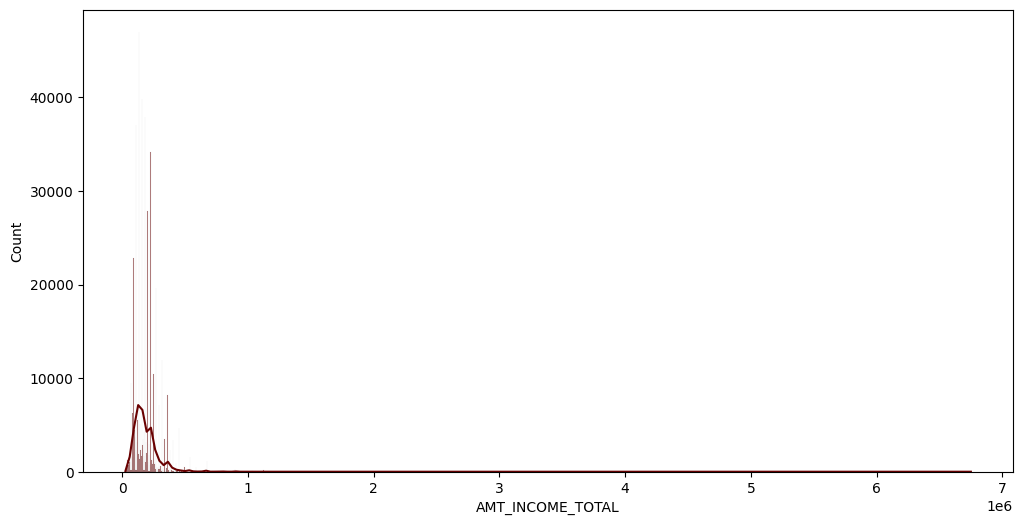

In [ ]:
plt.figure(figsize=(12,6))
sns.set_palette('hot')
sns.histplot(x='AMT_INCOME_TOTAL',data=df_app,kde=True);

Text(0.5, 1.0, 'Porcentaje que tiene Auto')

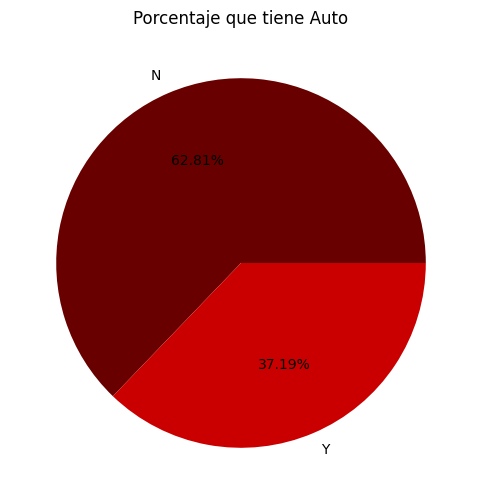

In [ ]:
car = df_app.groupby(['FLAG_OWN_CAR'])['ID'].count().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(13,6))
plt.pie(car.ID.values, labels= car.FLAG_OWN_CAR, autopct='%1.2f%%')
ax.set_title('Porcentaje que tiene Auto')

Text(0.5, 1.0, 'Porcentaje que tienen Propiedades')

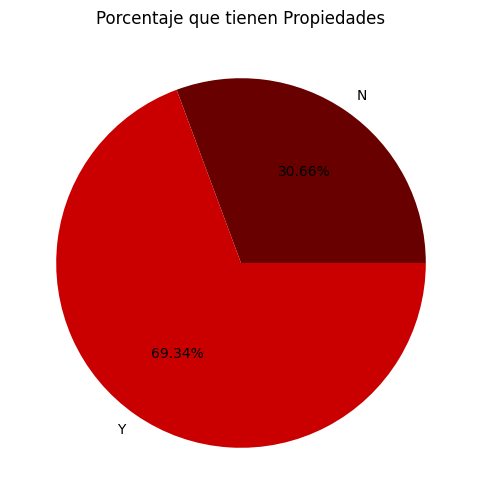

In [ ]:
propi = df_app.groupby(['FLAG_OWN_REALTY'])['ID'].count().to_frame().reset_index()
fig, ax = plt.subplots(figsize=(13,6))
plt.pie(propi.ID.values, labels= propi.FLAG_OWN_REALTY, autopct='%1.2f%%' )
ax.set_title('Porcentaje que tienen Propiedades')

**Conclusion:**